# Regresión logística EDA

`Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.`

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



Objetivos:

* Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.



* Explicar los datos y las variables disponibles en el conjunto de datos seleccionado


> El conjunto de datos que hemos seleccionado contiene informacion sobre los hábitos de alimentación y ejercicio en relación con la obesidad en países como Mexico, Perú y Colombia
> https://archive.ics.uci.edu/ml//datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+
>
> Las columnas que contiene son:
>* Gender: el género
>* Age: edad
>* Height: altura
>* Weight: peso
>* family_history_with_overweight: si algún miembro de la familia sufre de sobrepeso
>* FAVC: si come comida con alto contenido calórico frecuentemente (si/no)
>* FCVC: frecuencia con la que incluye vegetales en sus comidas
>* NCP: número de comidas al día
>* CAEC: si ingiere comida entre horas
>* SMOKE: fumador o no
>* CH2O: cantidad de agua al día
>* SCC: si revisa cuántas calorías ingiere al día
>* FAF: frecuencia con la que hace actividad física
>* TUE: cuánto tiempo pasa utlizando aparatos electrónicos al día (videojuegos, teléfono, televisor...)
>* CALC: frecuencia con la que bebe alcohol
>* MTRANS: qué tipo de transporte usa con más frecuencia
>* NObeyesdad: categoría de peso (normal, obeso, etc)



In [36]:
# Cargamos el dataframe
df = pd.read_csv('../Datos/ObesityData.csv').reset_index()
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
df.shape

(2111, 18)

* Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.


In [38]:
# Miramos los principales estadísticos de las columnas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2111.0,1055.000000,609.537530,0.00,527.500000,1055.000000,1582.500000,2110.00
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


> Aquí ya nos damos cuenta de que hay varias columnas numéricas que son en realidad categóricas

In [39]:
df.describe(include='O').T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


> Vemos que nuestra variable respeusta tiene 7 categorías

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

> Vemos que no tenemos nulos y que tenemos 2111 registros. Los tipos de dato parecen correctos

In [8]:
# Comprobamos que no tenemos nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
# No tenemos duplicados
df.duplicated().sum()

0

In [42]:
# Renombramos las columnas modificando sus nombres para una mejor comprensión
df.columns = ['index', 'gender', 'age', 'height', 'weight', 'antecedentes_familiares', 'comida_calorica','vegetales', 'num_comidas_dia', 'snacks', 'smoke', 'cantidad_agua_dia', 'mide_calorias', 'freq_ejercicio', 'tiempo_digital', 'freq_alcohol', 'medio_transporte', 'nivel_obesidad']

In [43]:
df.head(1)

,index,gender,age,height,weight,antecedentes_familiares,comida_calorica,vegetales,num_comidas_dia,snacks,smoke,cantidad_agua_dia,mide_calorias,freq_ejercicio,tiempo_digital,freq_alcohol,medio_transporte,nivel_obesidad
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


In [44]:
# Vemos que las frecuencias de comida calorica, ejercicio, tiempo digital... las podríamos redondear para que todas fueran enteros

In [45]:
# Separamos en variables numéricas y categóricas
numericas = df.select_dtypes(np.number)
numericas.head()

,index,age,height,weight,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital
0,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [46]:
numericas.duplicated().sum()

0

In [47]:
# Redondeamos las variables numéricas que nos interesan
numericas_round = np.rint(numericas[['age','vegetales', 'num_comidas_dia','cantidad_agua_dia', 'freq_ejercicio', 'tiempo_digital']])
numericas_round.head()

,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital
0,21.0,2.0,3.0,2.0,0.0,1.0
1,21.0,3.0,3.0,3.0,3.0,0.0
2,23.0,2.0,3.0,2.0,2.0,1.0
3,27.0,3.0,3.0,2.0,2.0,0.0
4,22.0,2.0,1.0,2.0,0.0,0.0


In [48]:
# Convertiremos estas variables numéricas en categóricas excepto age
columnas_categoria = ['vegetales', 'num_comidas_dia','cantidad_agua_dia', 'freq_ejercicio', 'tiempo_digital']

for i in columnas_categoria:
    numericas_round[i] = numericas_round[i].astype("category")

In [49]:
# Comprobamos si se hizo la transformación
numericas_round.dtypes

age                   float64
vegetales            category
num_comidas_dia      category
cantidad_agua_dia    category
freq_ejercicio       category
tiempo_digital       category
dtype: object

In [51]:
# Aquí tenemos las columnas que no queríamos redondear
numericas_sinr = numericas[['height','weight']]
numericas_sinr

,height,weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
2106,1.710730,131.408528
2107,1.748584,133.742943
2108,1.752206,133.689352
2109,1.739450,133.346641


In [52]:
# Concatenamos con la coulmna age redondeada
num = pd.concat([numericas_sinr, numericas_round['age']], axis=1)
num.head()

,height,weight,age
0,1.62,64.0,21.0
1,1.52,56.0,21.0
2,1.80,77.0,23.0
3,1.80,87.0,27.0
4,1.78,89.8,22.0


In [55]:
# Creamos un nuevo df con las columnas redondeadas
df2 = pd.concat([df[['index','gender','antecedentes_familiares','comida_calorica','snacks', 'smoke','mide_calorias','freq_alcohol','medio_transporte','nivel_obesidad']], numericas_round, num[['height', 'weight']]], axis=1)
df2.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,21.0,2.0,3.0,2.0,0.0,1.0,1.62,64.0
1,1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,21.0,3.0,3.0,3.0,3.0,0.0,1.52,56.0
2,2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,23.0,2.0,3.0,2.0,2.0,1.0,1.80,77.0
3,3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,27.0,3.0,3.0,2.0,2.0,0.0,1.80,87.0
4,4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,22.0,2.0,1.0,2.0,0.0,0.0,1.78,89.8


In [57]:
df2.duplicated().sum()

0

In [58]:
# Vemos la frecuencia de cada categoría
dicc = {'variable':[], 'valores_unicos':[], 'frecuencias':[]}

for col in df2.columns:
    dicc['variable'].append(col)
    dicc['valores_unicos'].append(list(df2[col].value_counts().index))
    dicc['frecuencias'].append(list(df2[col].value_counts().values))

In [59]:
df_uniques = pd.DataFrame(dicc)
df_uniques

,variable,valores_unicos,frecuencias
0,index,"[0, 1418, 1416, 1415, 1414, 1413, 1412, 1411, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,gender,"[Male, Female]","[1068, 1043]"
2,antecedentes_familiares,"[yes, no]","[1726, 385]"
3,comida_calorica,"[yes, no]","[1866, 245]"
4,snacks,"[Sometimes, Frequently, Always, no]","[1765, 242, 53, 51]"
5,smoke,"[no, yes]","[2067, 44]"
6,mide_calorias,"[no, yes]","[2015, 96]"
7,freq_alcohol,"[Sometimes, no, Frequently, Always]","[1401, 639, 70, 1]"
8,medio_transporte,"[Public_Transportation, Automobile, Walking, M...","[1580, 457, 56, 11, 7]"
9,nivel_obesidad,"[Obesity_Type_I, Obesity_Type_III, Obesity_Typ...","[351, 324, 297, 290, 290, 287, 272]"


> Pasamos al análisis exploratorio visual

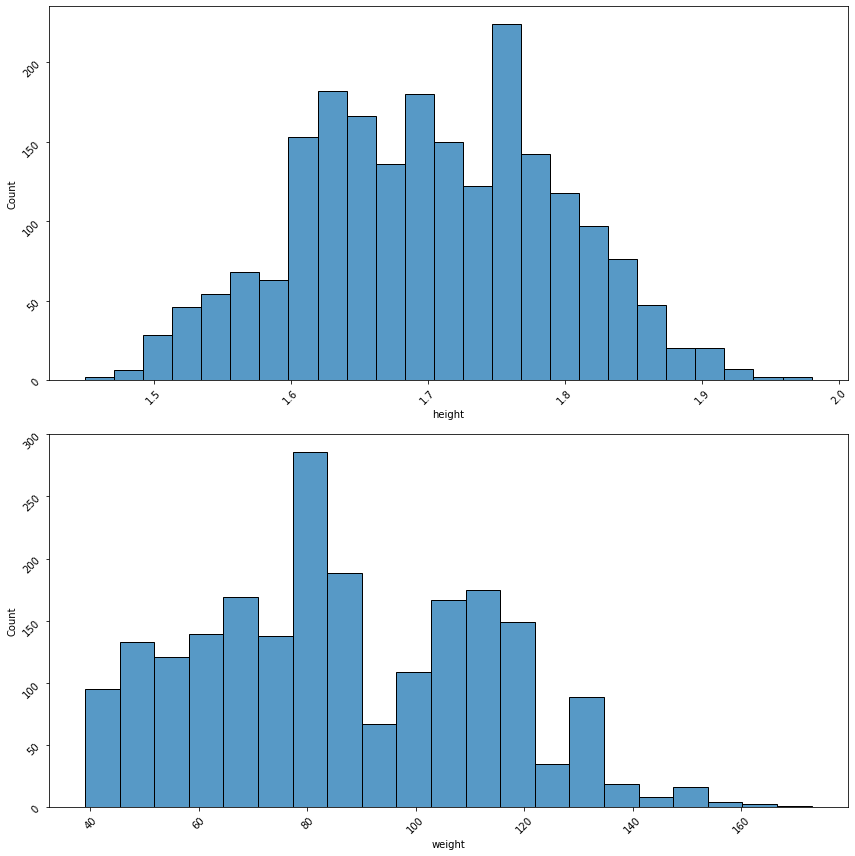

In [60]:
# Vamos a visualizar la distribución de nuestras variables numéricas
fig, axes = plt.subplots(2, figsize=(12,12))

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(numericas_sinr.columns)):
    sns.histplot(x = numericas_sinr.columns[i], data = df2, ax=axes[i])

fig.tight_layout()
plt.show();

> Vemos que hay un desequililbrio entre la distribución de altura y peso, por lo que se ve que no están muy balanceados

In [61]:
# Seleccionamos nuestras columnas categóricas
categoricas= df2.select_dtypes(include=['object', 'category'])
categoricas.head()

,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,2.0,3.0,2.0,0.0,1.0
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,3.0,3.0,3.0,3.0,0.0
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,2.0,3.0,2.0,2.0,1.0
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,3.0,3.0,2.0,2.0,0.0
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,2.0,1.0,2.0,0.0,0.0


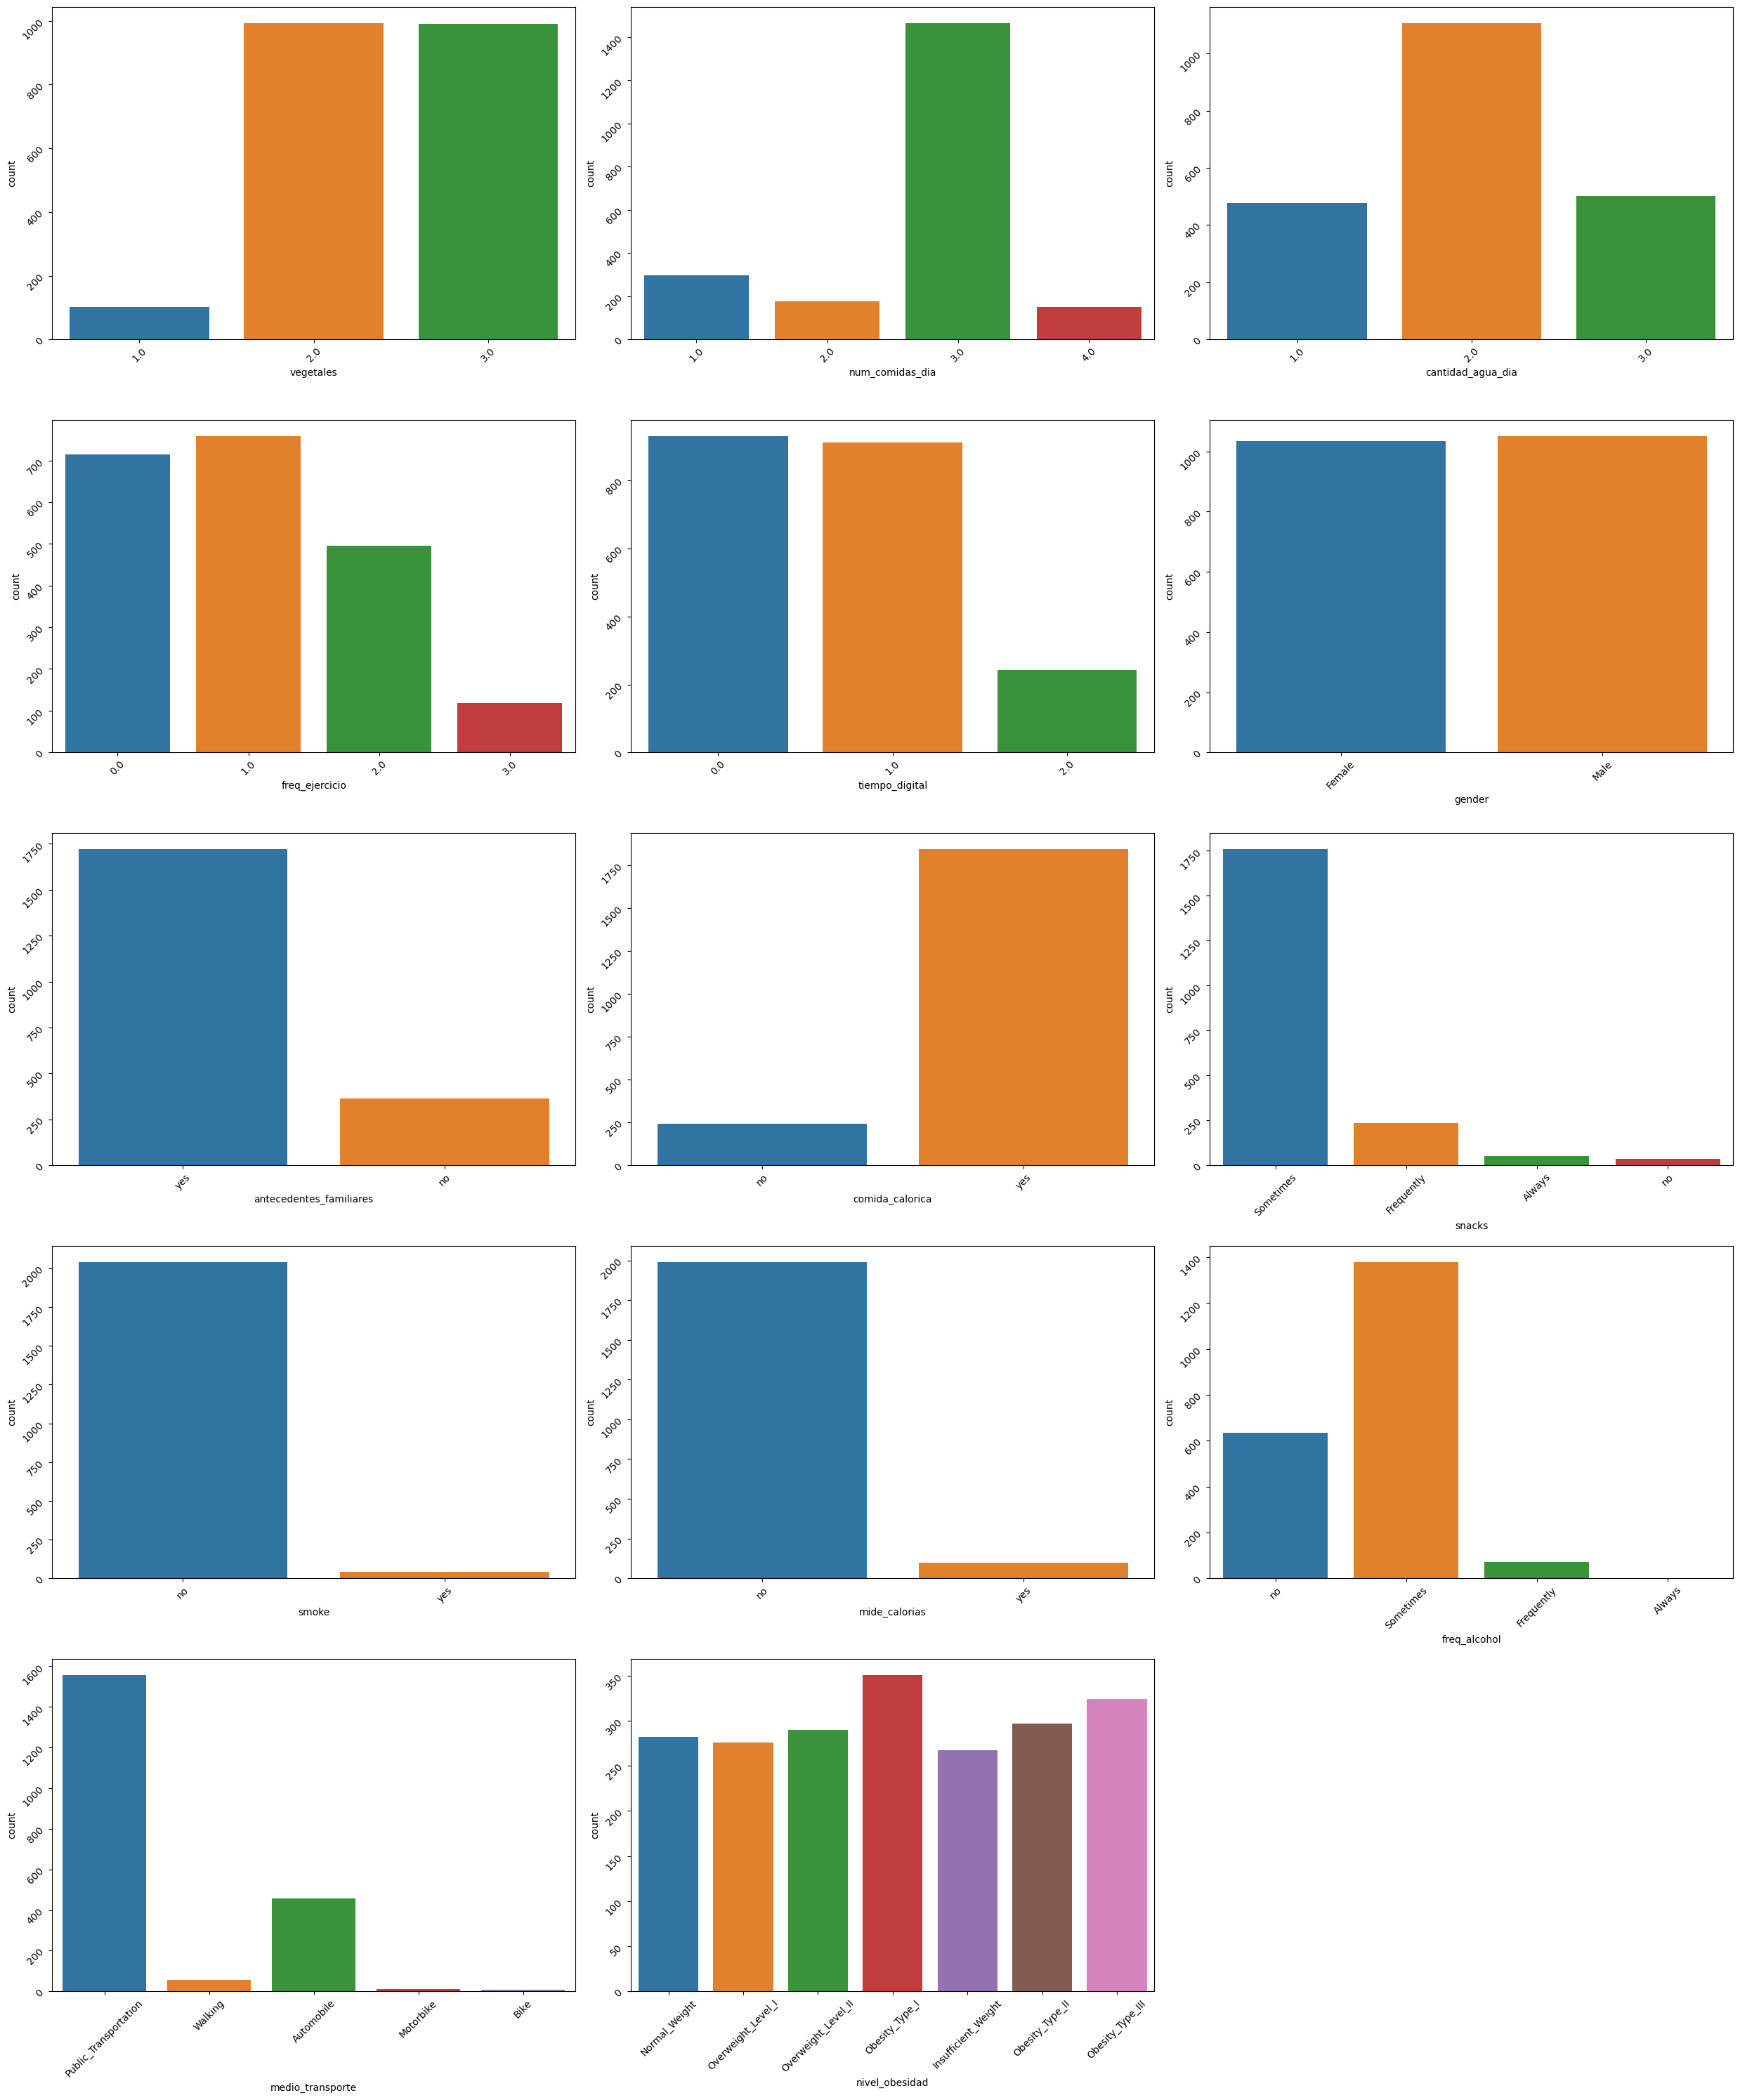

In [23]:
fig, axes = plt.subplots(5, 3, figsize=(25,30))
axes = axes.flat
for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(categoricas.columns)):
    sns.countplot(x = categoricas.columns[i], data = df2, ax=axes[i]); 

fig.tight_layout()
fig.delaxes(axes[-1])
plt.show();


> Vemos que nuestra variable respuesta está bastante balanceada y que las demás tienen sentido para el análisis.

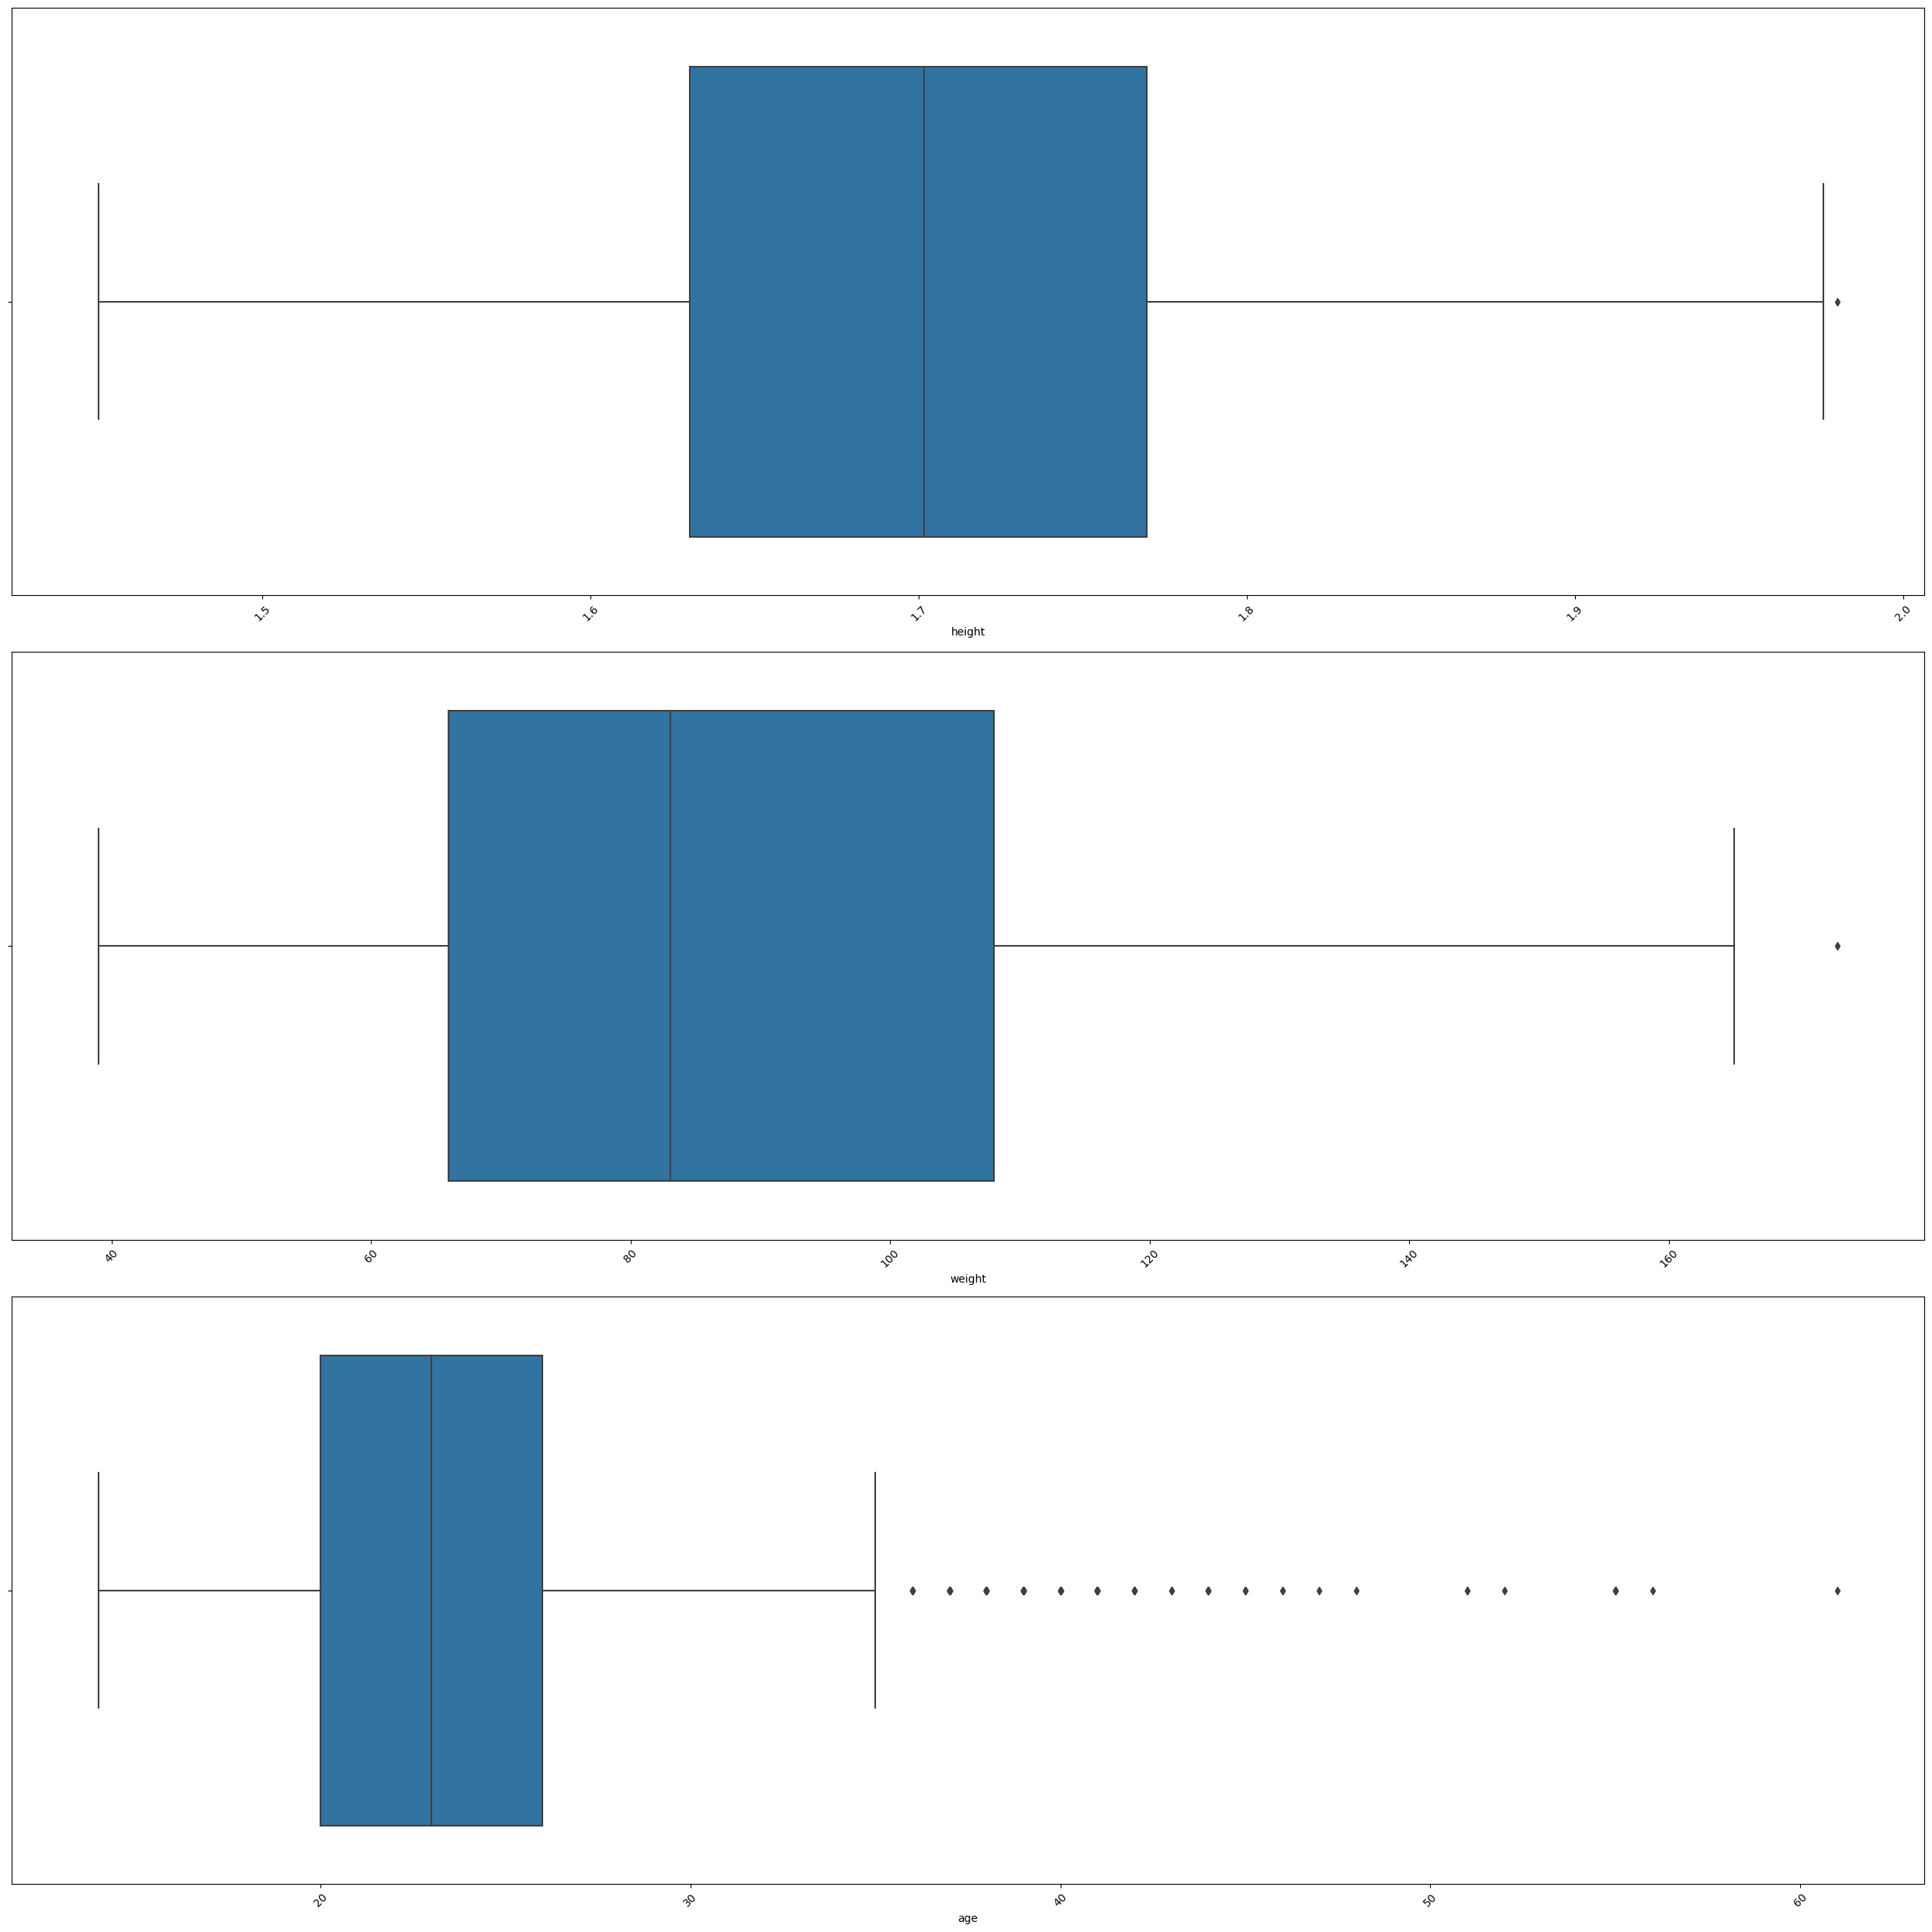

In [24]:
fig, axes = plt.subplots(3, figsize=(25,25))
#axes = axes.flat
for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(num.columns)):
    sns.boxplot(x = num.columns[i], data = df2, ax=axes[i]);

fig.tight_layout()
plt.show();



> No consideramos que tengamos outliers, aunque sí tenemos algunos datos que se salen de la media.
>
>No consideramos que tengamos motivos de peso para dividir el estudio según la edad, que es donde tenemos más outliers

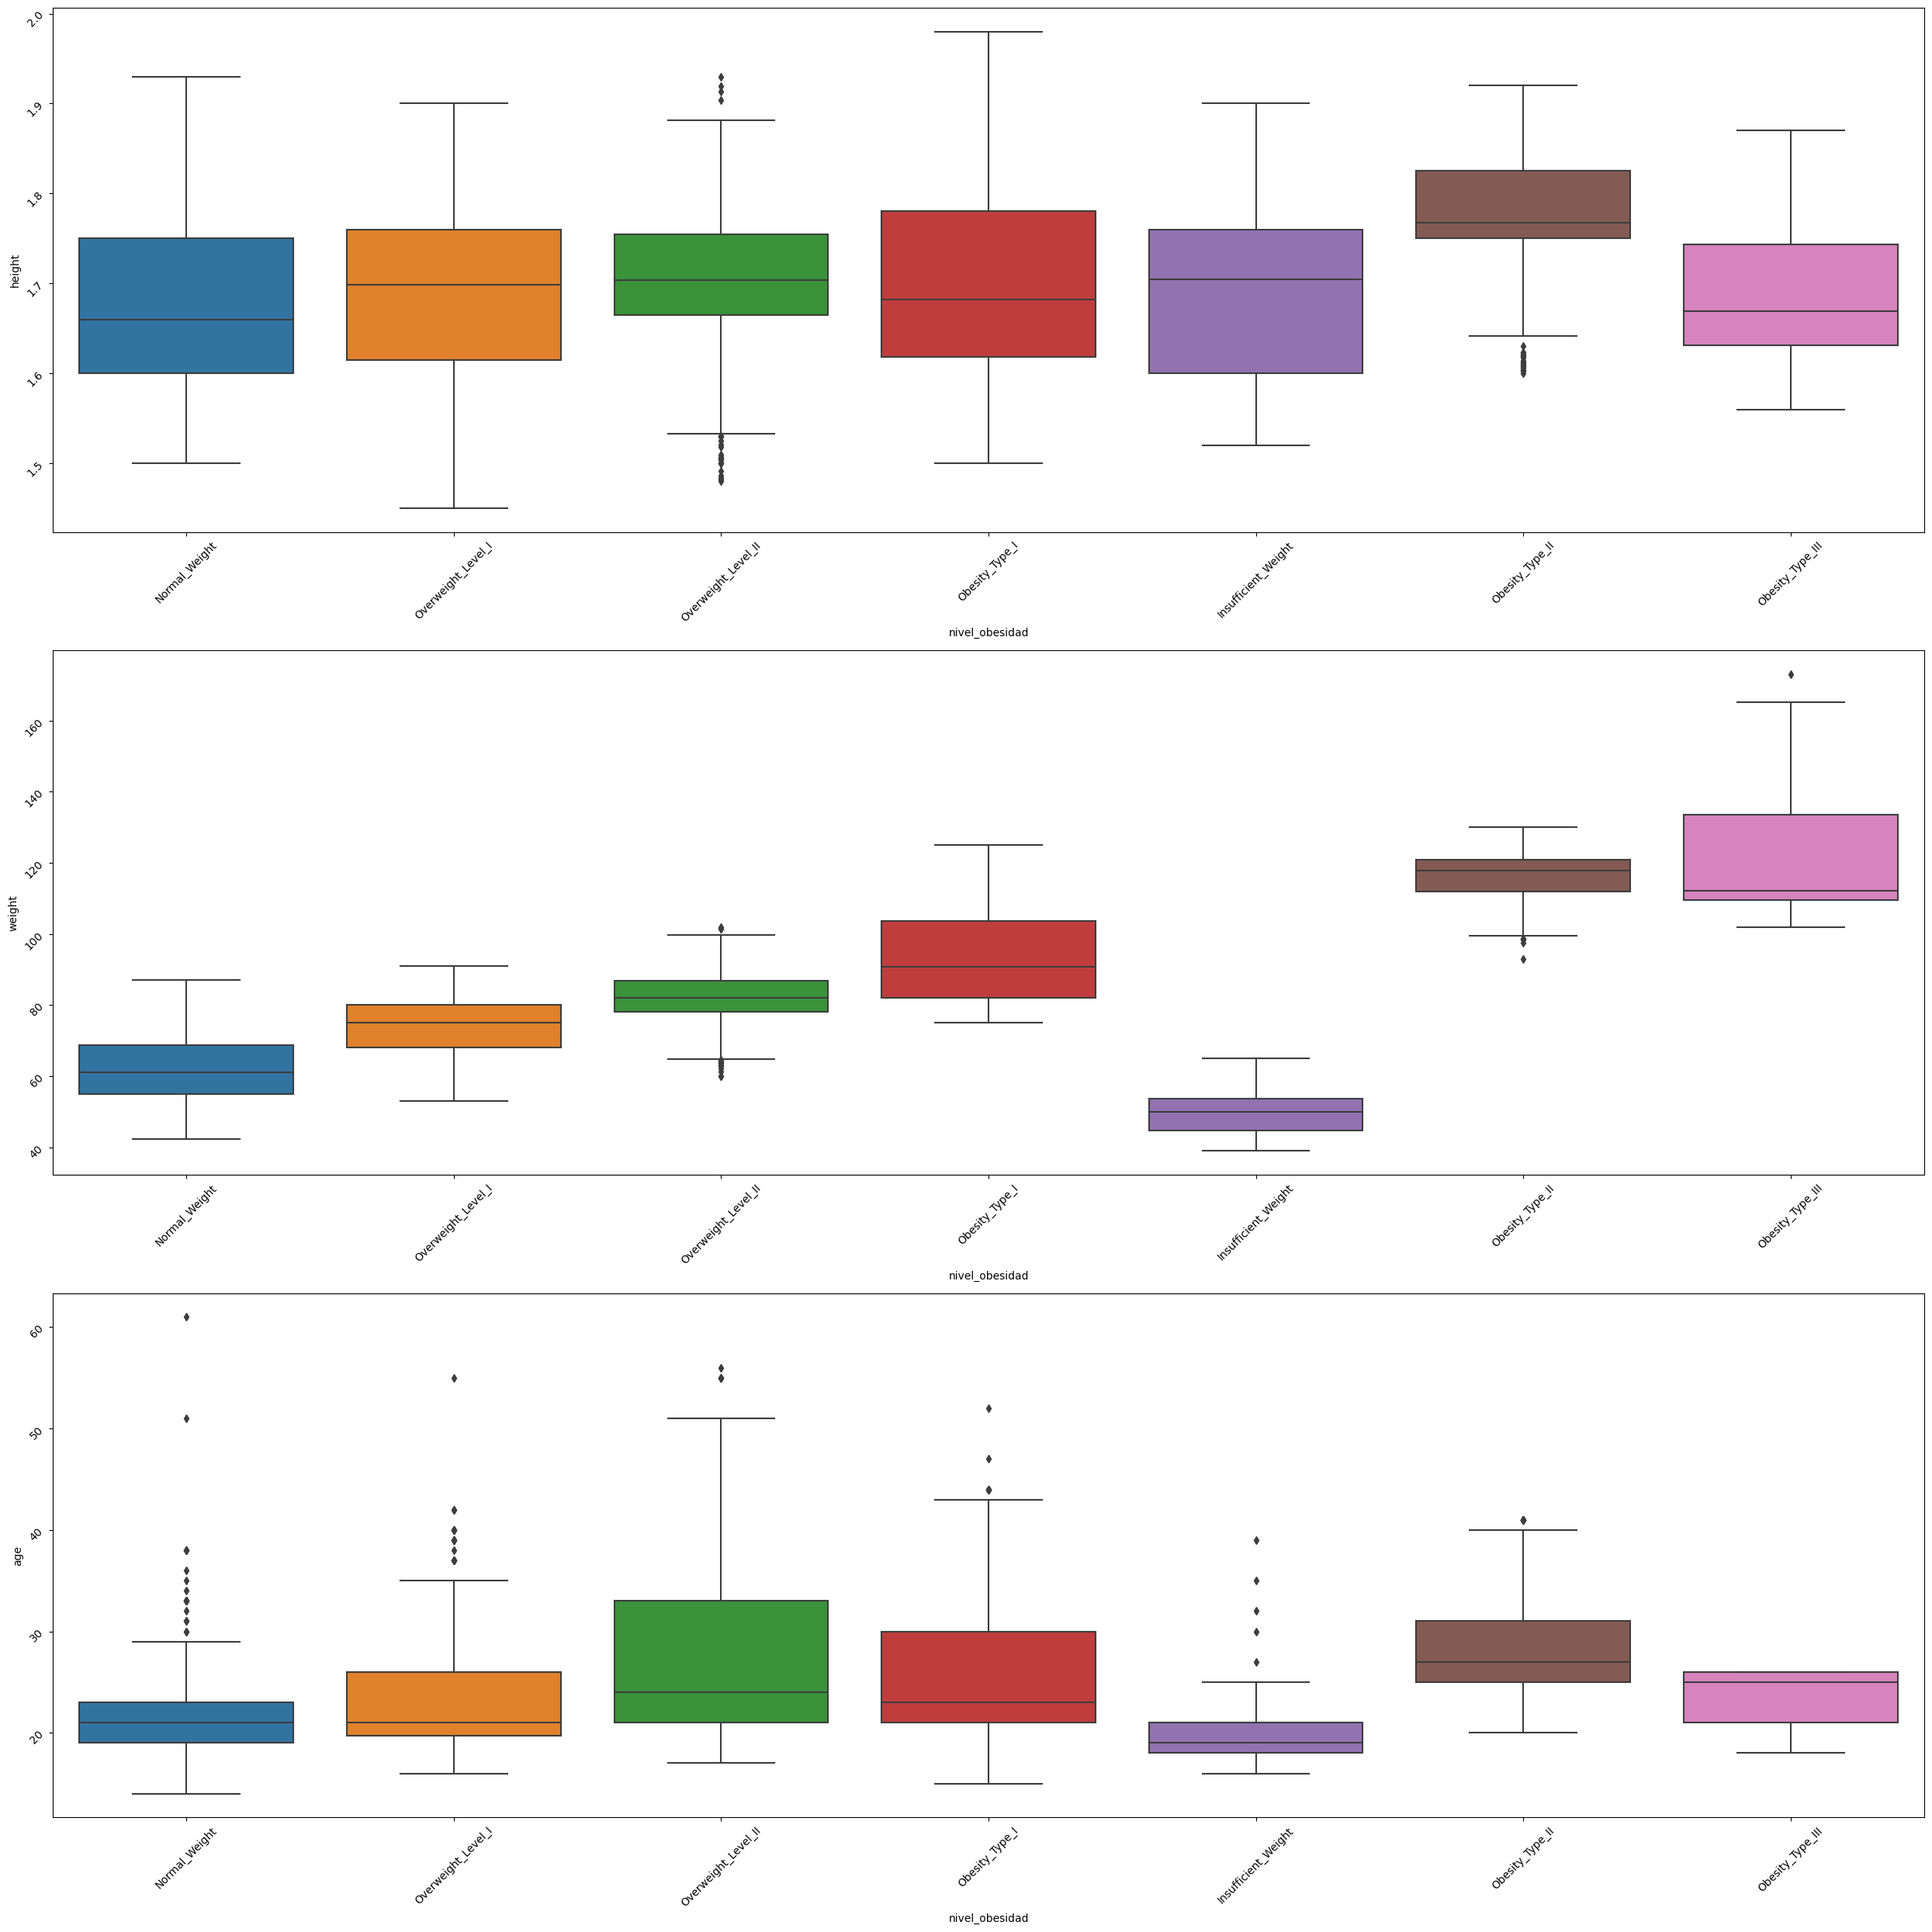

In [25]:
fig, axes = plt.subplots(3, figsize=(25,25))
axes = axes.flat
for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(num.columns)):
    sns.boxplot(x = 'nivel_obesidad', y = num.columns[i], data = df2, ax=axes[i]);

fig.tight_layout()
plt.show();

> Vemos que nuestros datos van de acuerdo a la lógica, por ejemplo el peso con nivel de obesidad.
>
> Por lo demás vemos que puede haber una influencia leve de la altura y la edad con respecto a la obesidad.

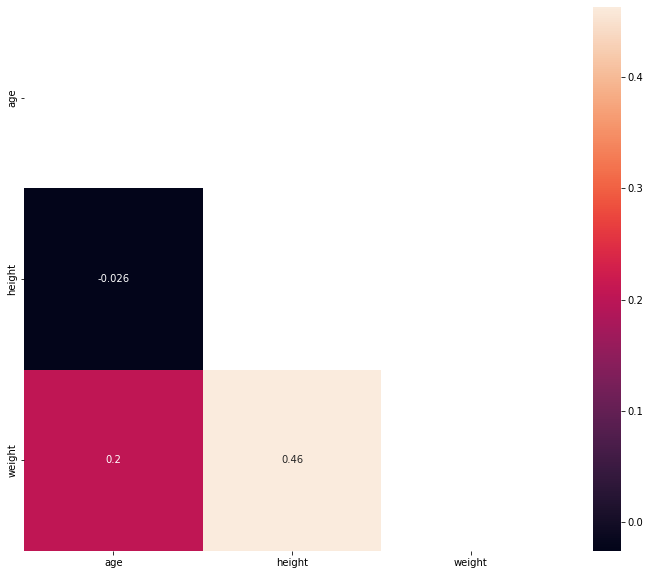

In [66]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.drop('index', axis=1).corr(), mask=np.triu(np.ones_like(df2.drop('index', axis=1).corr())), annot= True);

> Vemos que nuestras variables numéricas no están muy correlacionadas, aunque sí que tienen algo de correlación positiva el peso y la altura y la edad y el peso.
>
>  Como curiosidad, podemos interpretar que hay una leve correlación negativa entre la altura y la edad, es decir, a mayor edad menos altura.

In [68]:
df2.head(10)

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,21.0,2.0,3.0,2.0,0.0,1.0,1.62,64.0
1,1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,21.0,3.0,3.0,3.0,3.0,0.0,1.52,56.0
2,2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,23.0,2.0,3.0,2.0,2.0,1.0,1.80,77.0
3,3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,27.0,3.0,3.0,2.0,2.0,0.0,1.80,87.0
4,4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,22.0,2.0,1.0,2.0,0.0,0.0,1.78,89.8
5,5,Male,no,yes,Sometimes,no,no,Sometimes,Automobile,Normal_Weight,29.0,2.0,3.0,2.0,0.0,0.0,1.62,53.0
6,6,Female,yes,yes,Sometimes,no,no,Sometimes,Motorbike,Normal_Weight,23.0,3.0,3.0,2.0,1.0,0.0,1.50,55.0
7,7,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight,22.0,2.0,3.0,2.0,3.0,0.0,1.64,53.0
8,8,Male,yes,yes,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,24.0,3.0,3.0,2.0,1.0,1.0,1.78,64.0
9,9,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Normal_Weight,22.0,2.0,3.0,2.0,1.0,1.0,1.72,68.0


In [71]:
# Guardamos nuestro dataframe en pickle para conservar los tipos de datos que acabamos de cambiar
df2.to_pickle('../Datos/obesity_eda.pkl')

* Interpretación de los resultados.

> A modo de conclusión de nuestro análisis exploratorio inicial: 
>
>* Tenemos un set de datos muy apropiado para hacer una regresión logística.
>
>* No contaba con nulos y nuestra variable respuesta está muy balanceada, por lo que no necesitaremos hacer downsampling o upsampling.
>
>* No tenemos outliers que consideremos que haya que procesar.
>
>* De nuestra variable respuesta conservaremos todas las categorías, sólo haremos un encoding de la misma para pasarla a numérica y así poder trabajar con sklearn.
>
>* Todas nuestras columnas son relevantes y creemos que nos pueden ayudar para realizar la regresión logística, asique las conservaremos todas.